In [1]:
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import mglearn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

def gini(actual, pred):
    assert len(actual) == len(pred)
    # 가정 조건문 assert 조건, (메시지)
    #np.c_는 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열을 만드는 것이다
    all = np.asarray(np.c_[actual,pred,np.arrange(len(actual))],dtype = np.float)
    all = all[np.lexsort((all[:,2],-1*all[:,1]))]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum()/totalLosses
    
    giniSum = (len(actual)+1)/2
    return giniSum/len(actual)

def gini_normalized(actual,pred):
    return gini(actual, pred)/ gini(actual,actual)







In [2]:
train = pd.read_csv('./Desktop/porto-seguro-safe-driver-prediction/train.csv',na_values=['-1','-1.0'])
test = pd.read_csv('./Desktop/porto-seguro-safe-driver-prediction/test.csv',na_values=['-1','-1.0'])
train.head

<bound method NDFrame.head of              id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2            2.0          5            1.0   
1             9       0          1            1.0          7            0.0   
2            13       0          5            4.0          9            1.0   
3            16       0          0            1.0          2            0.0   
4            17       0          0            2.0          0            1.0   
5            19       0          5            1.0          4            0.0   
6            20       0          2            1.0          3            1.0   
7            22       0          5            1.0          4            0.0   
8            26       0          5            1.0          3            1.0   
9            28       1          1            1.0          2            0.0   
10           34       0          5            2.0          2            0.0   
11           35       

In [3]:
train.shape

(595212, 59)

In [4]:
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [6]:
train.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [7]:
print(train.target.unique())

[0 1]


In [8]:
print(sum(train['target']==1)/train.shape[0]*100)

3.6447517859182947


In [9]:
train.shape

(595212, 59)

In [10]:
train.shape[0]

595212

In [11]:
# target의 1의 계수가 3.6% 밖에 되지 않아서 upsampling이나 downsampling이 필요하다

# 시각화로 데이터보기
test['target'] = np.nan
df = pd.concat([train,test],axis=0) # pd.concat은 데이터를 합쳐준다


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


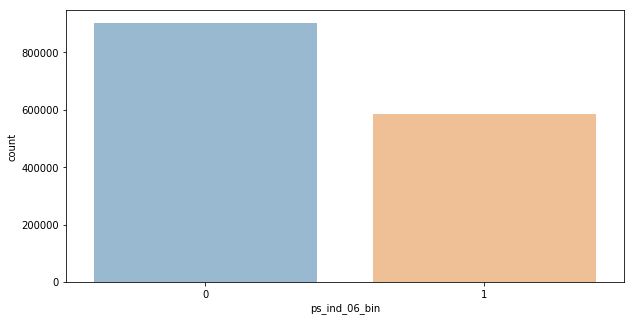

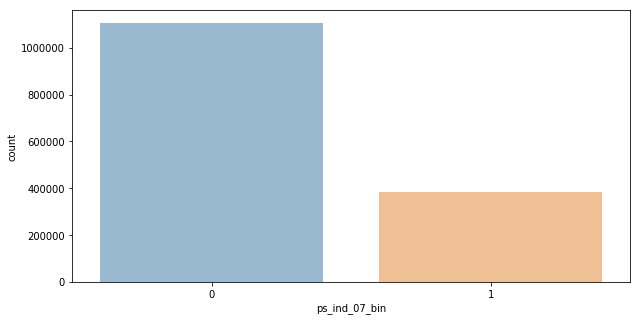

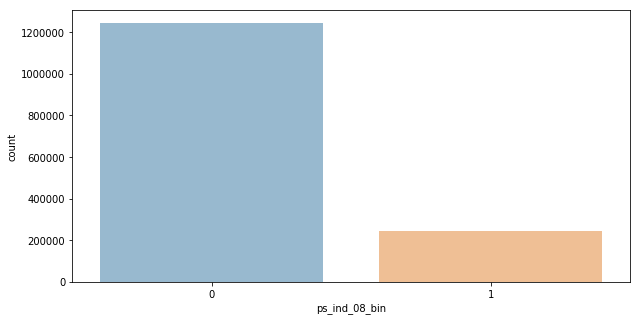

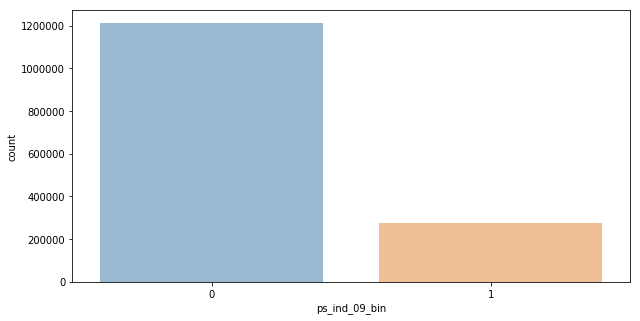

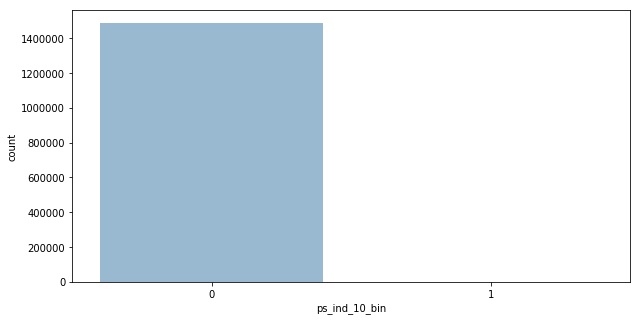

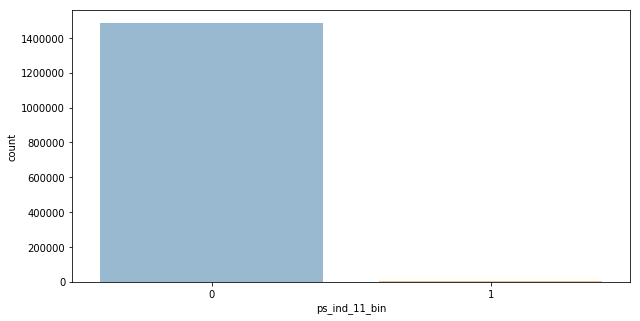

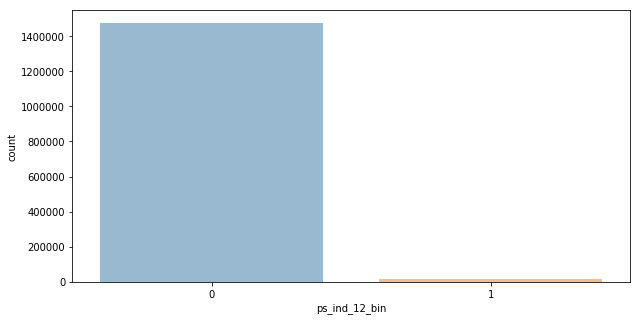

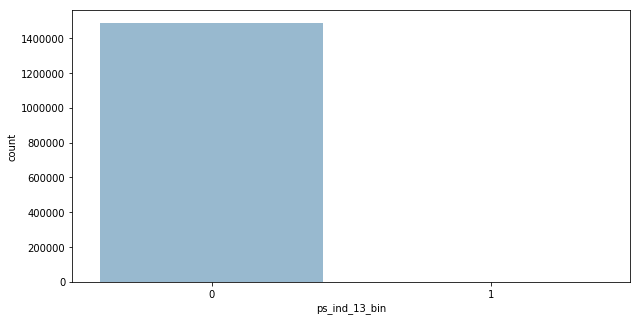

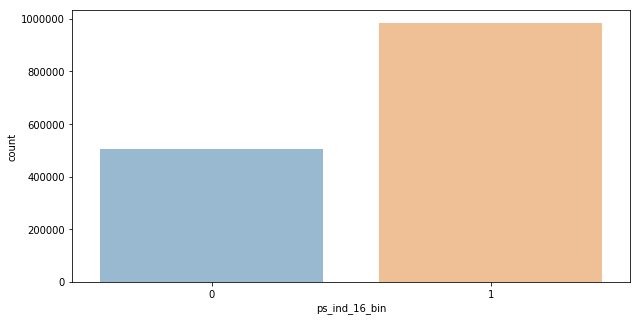

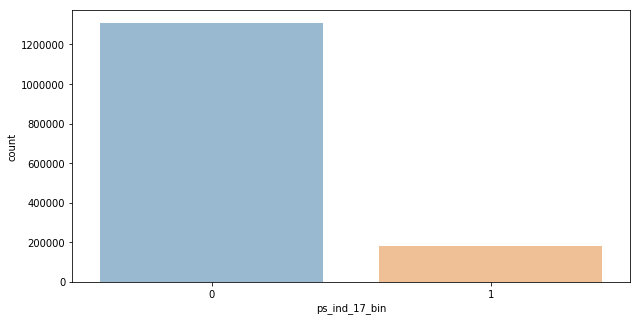

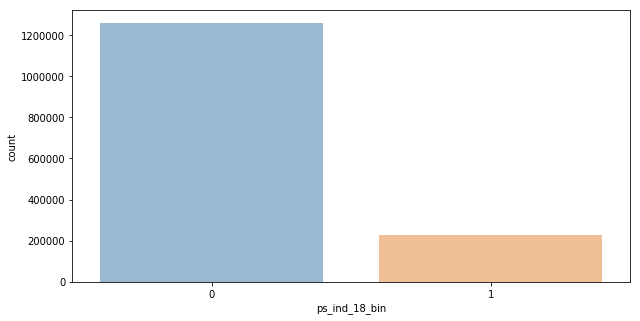

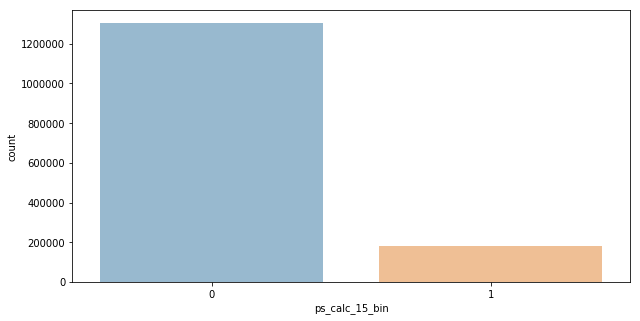

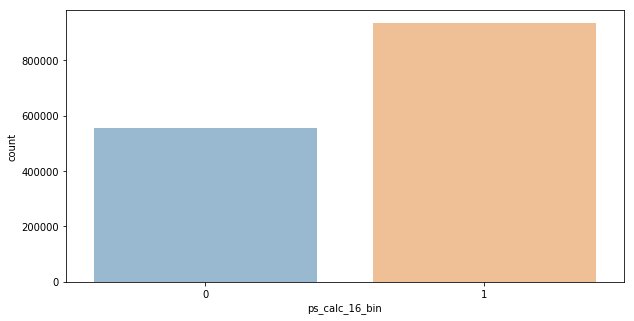

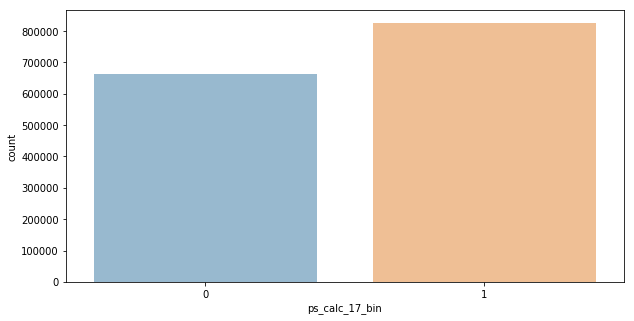

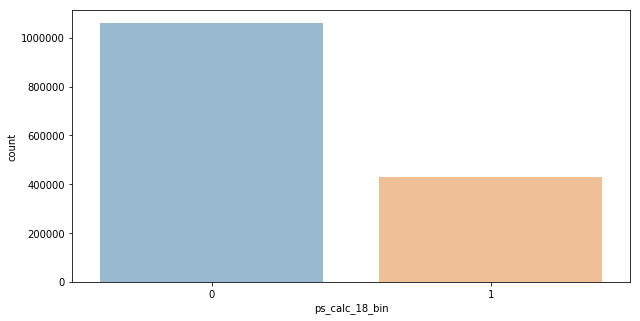

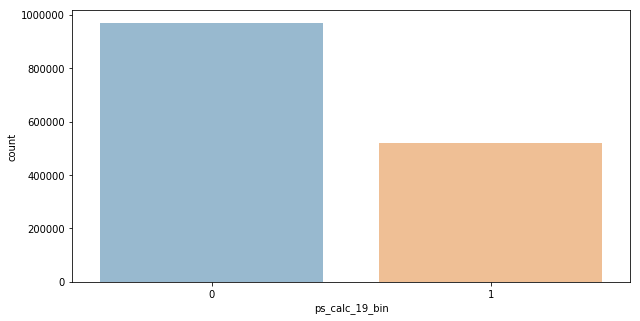

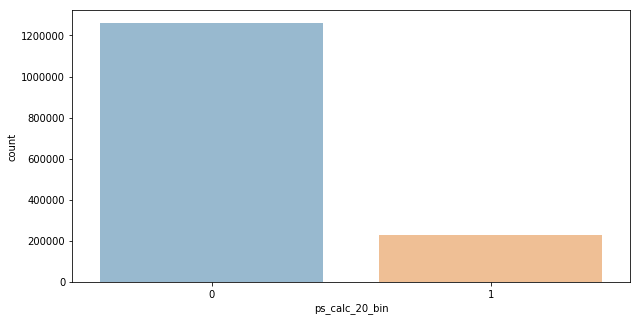

In [12]:
def bar_plot(col,data,hue=None): # data, hue 값을 받아서 hye값에 따른 seaborn의 countplot을 보여줌
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col,hue=hue,data=data,alpha=0.5)
    plt.show()
    
def dist_plot(col,data): # 히스토그램 그래플 ㄹ그려준다. data[col]을 이용해서 해당 컬럼의 히스토그램 그려줌
    f,ax = plt.subplots(figsize=(10,5))
    sns.displot(data[col].dropna(),kde=False,bins=10)
    plt.show()
    
def bar_plot_ci(col,data): # target을 기준으로 컬럼 값과 target의 관계를 살펴본다
    f,ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col,y='target',data=data)
    plt.show()
    
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin',
         'ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin',
         'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']

# 범주형 변수
category = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat',
           'ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat',
           'ps_car_10_cat','ps_car_11_cat']

# 정수형 변수
integer = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_calc_04','ps_calc_05','ps_calc_06',
          'ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13',
          'ps_calc_14','ps_car_11']

# 소수형 변수
floats = ['ps_reg_01','ps_reg_02','ps_reg_03','ps_calc_01','ps_calc_02','ps_calc_03','ps_car_12','ps_car_13',
         'ps_car_14','ps_car_15']

for col in binary:
    bar_plot(col,df)

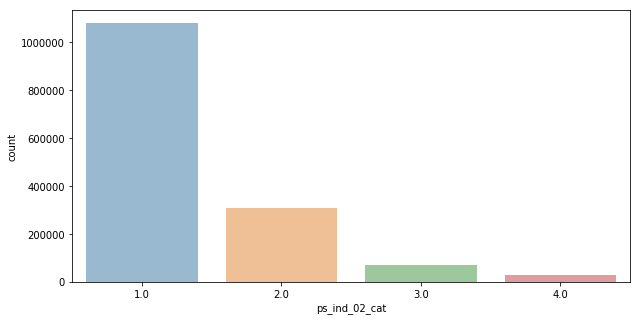

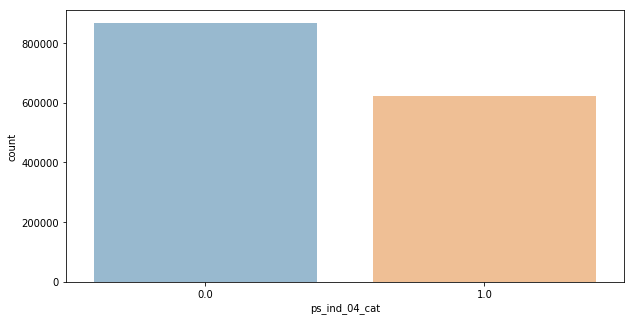

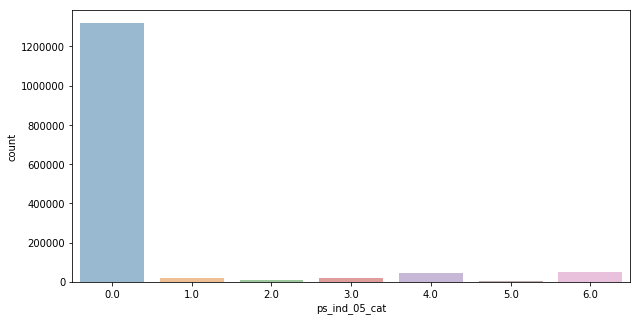

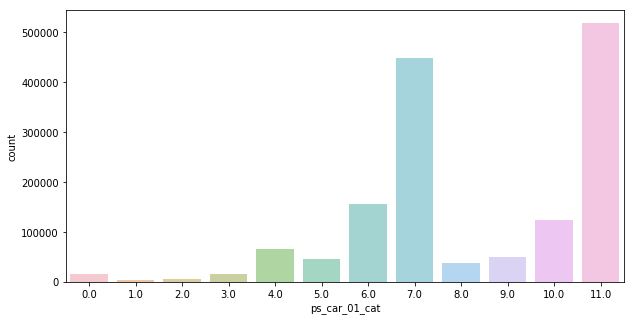

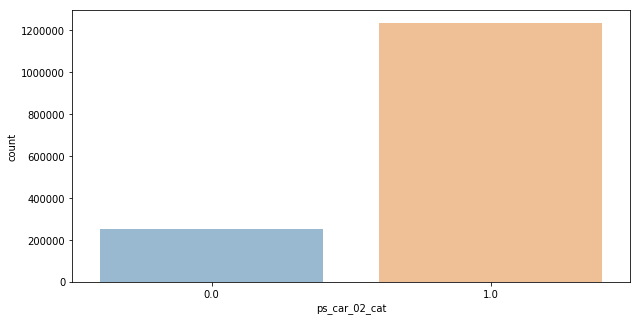

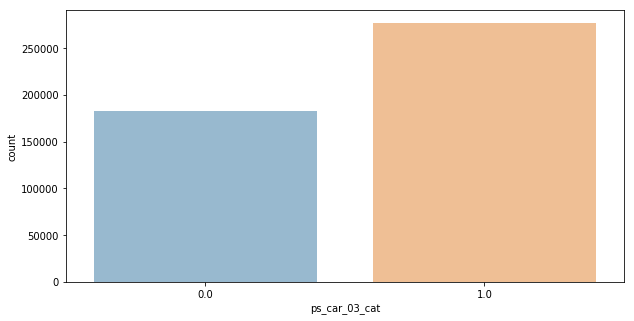

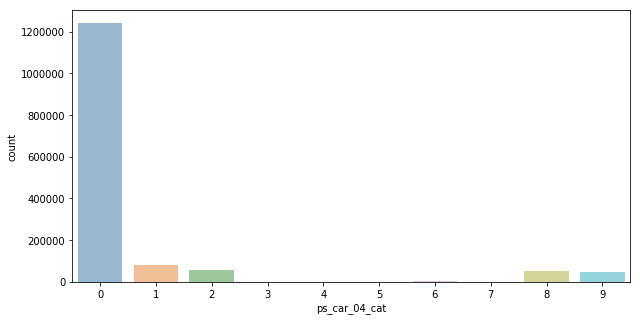

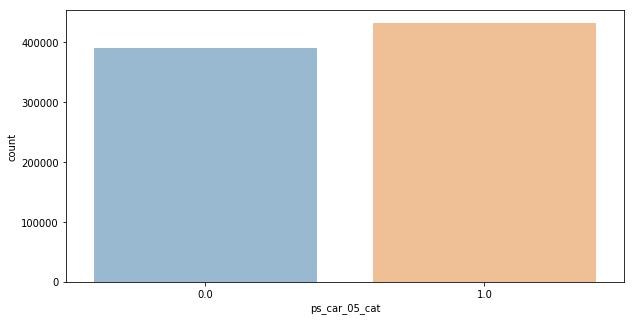

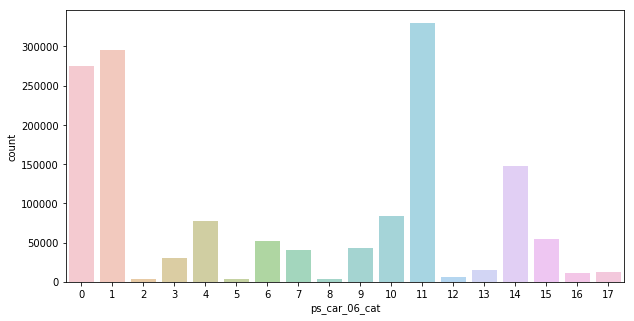

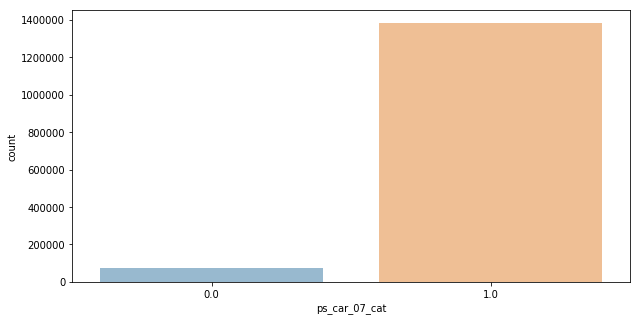

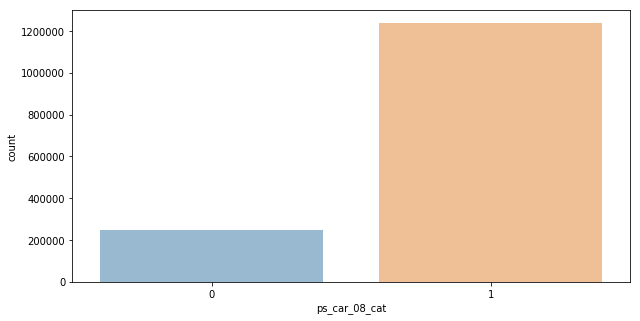

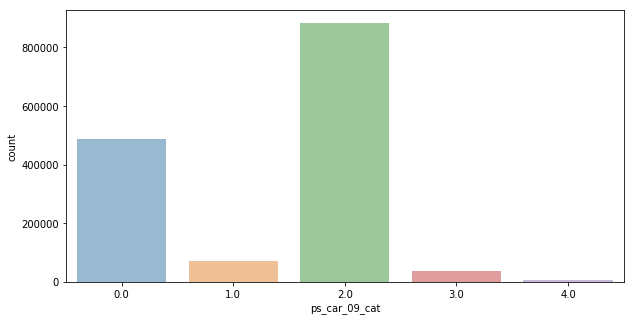

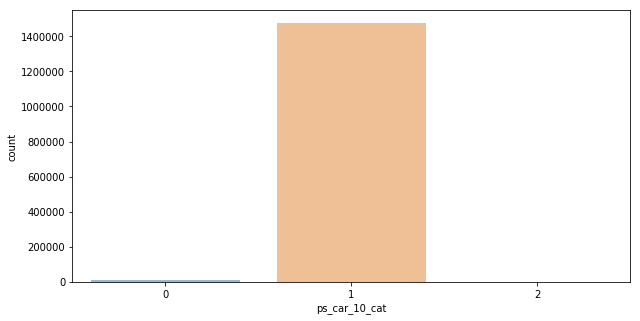

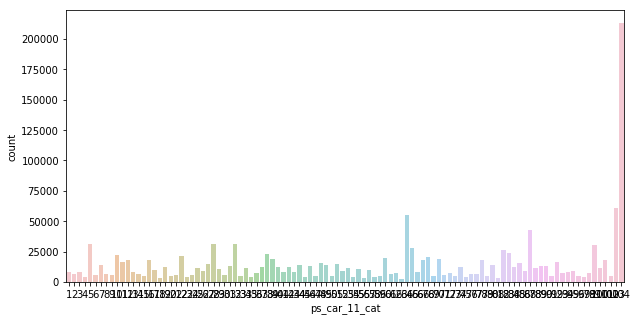

In [13]:
# 카테고리보기
for col in category:
    bar_plot(col,df)

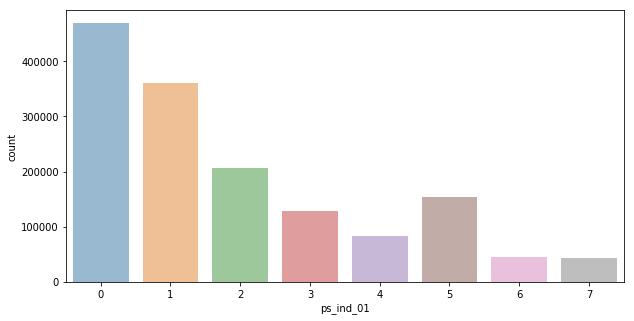

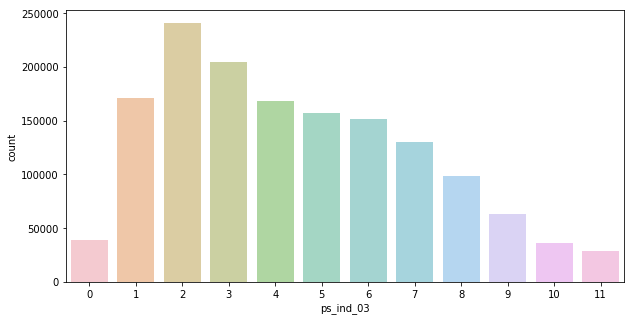

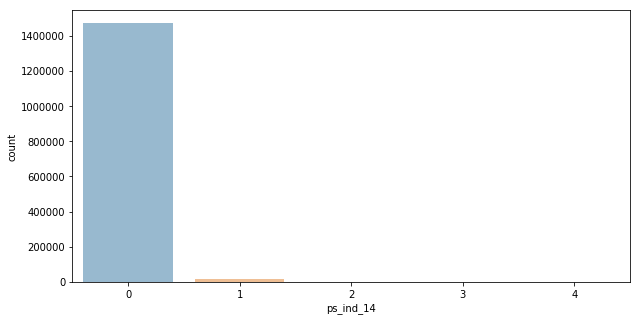

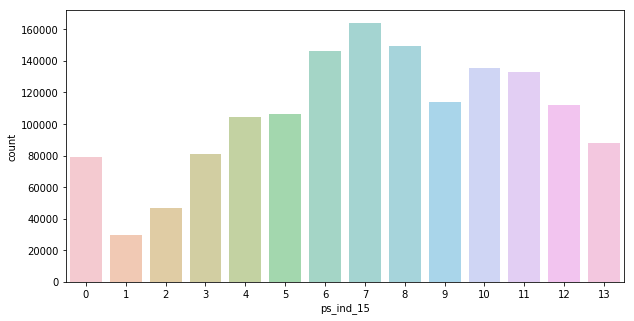

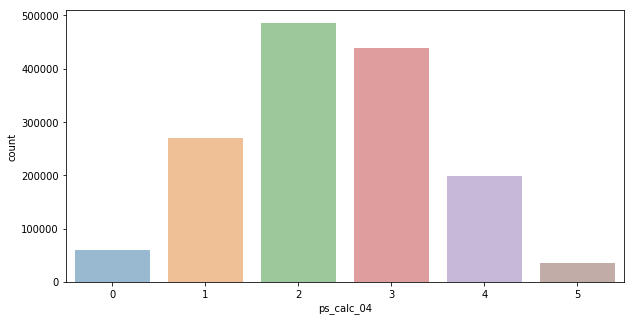

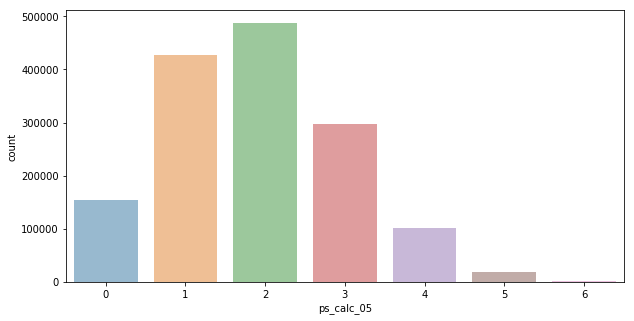

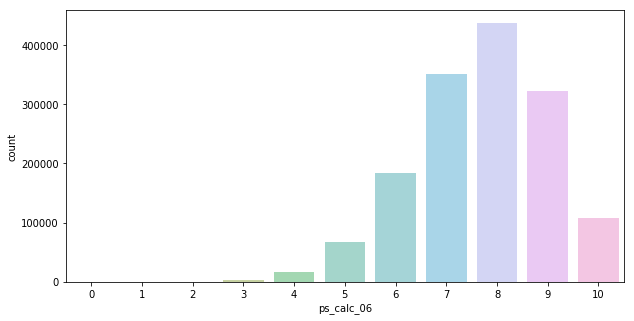

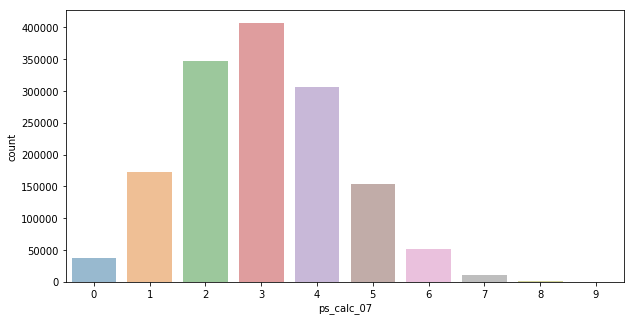

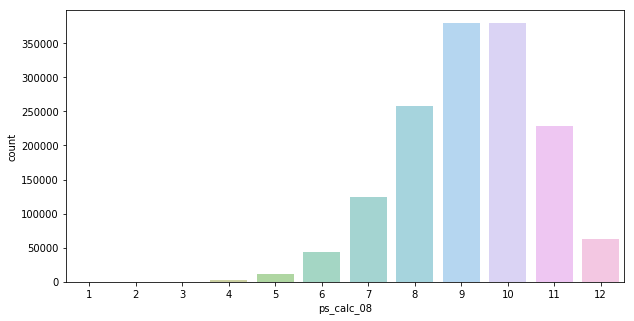

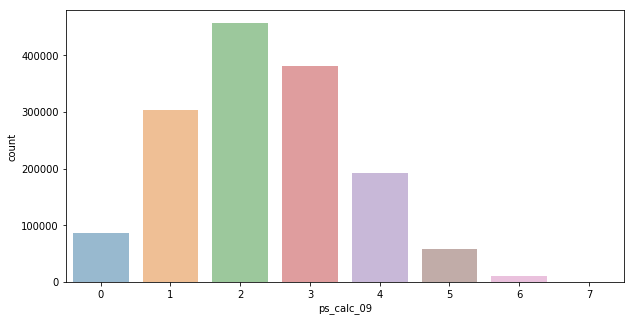

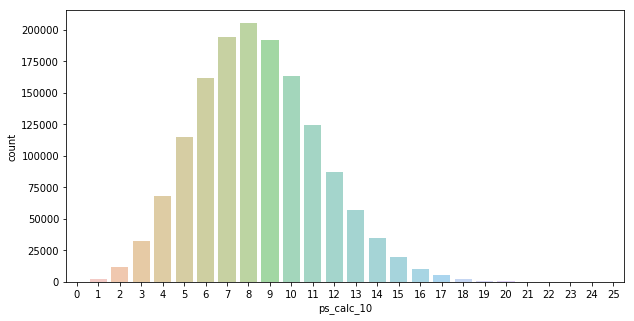

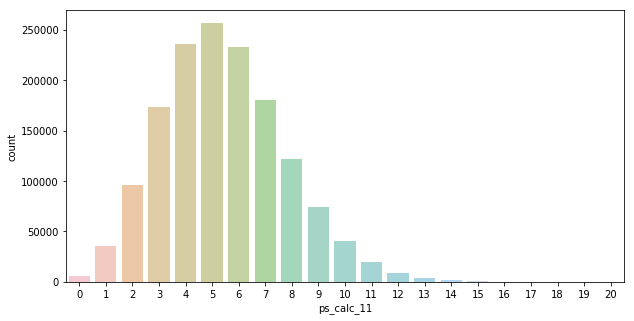

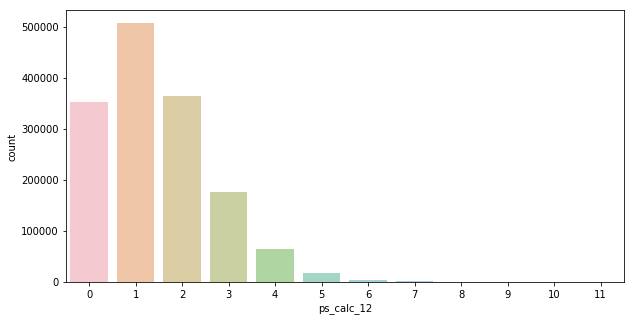

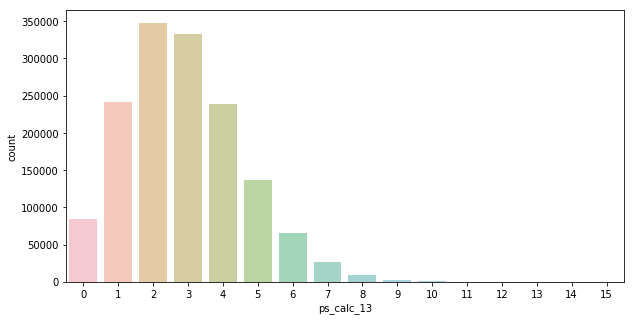

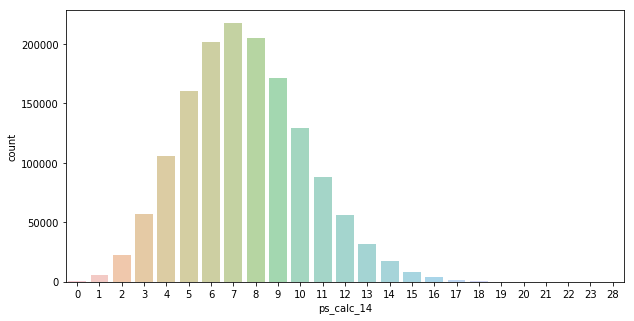

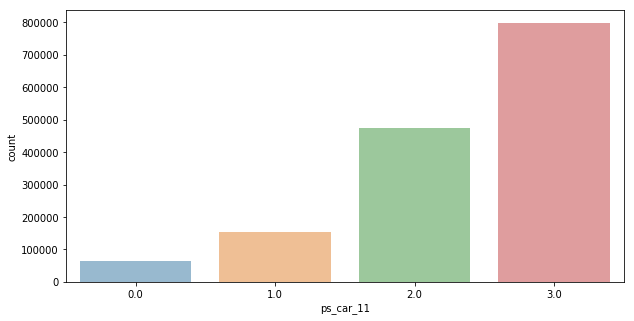

In [14]:
# 정수형 보기( 한쪽으로만 쏠려있음)
for col in integer:
    bar_plot(col,df)
    

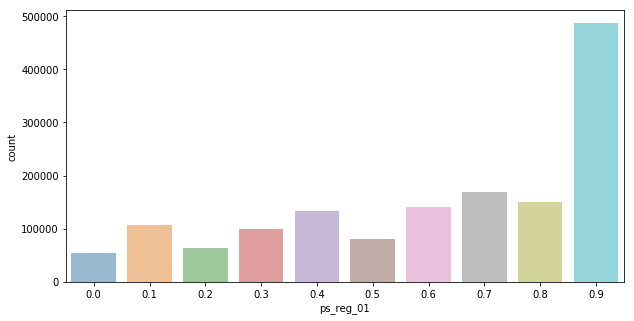

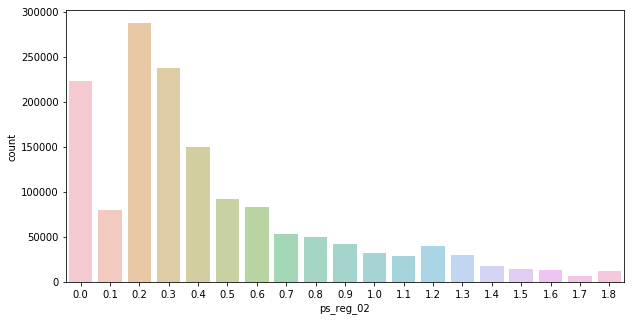

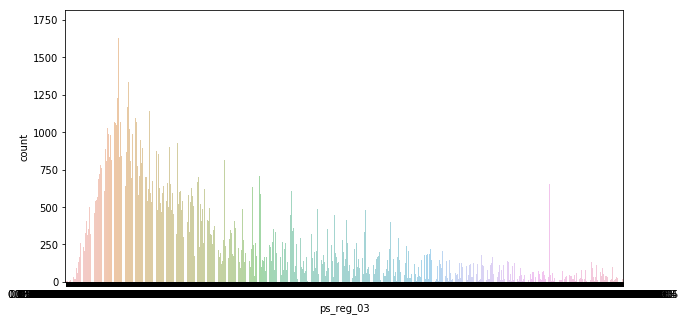

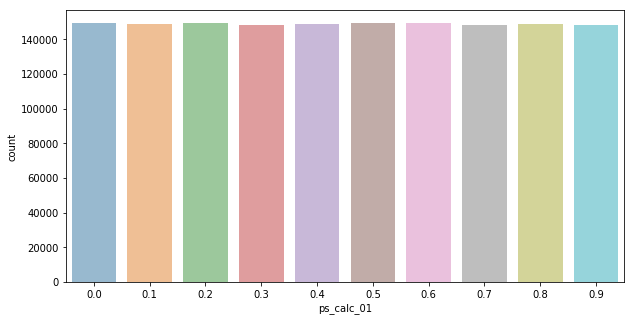

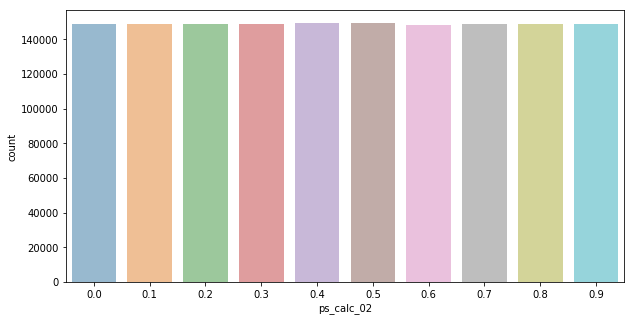

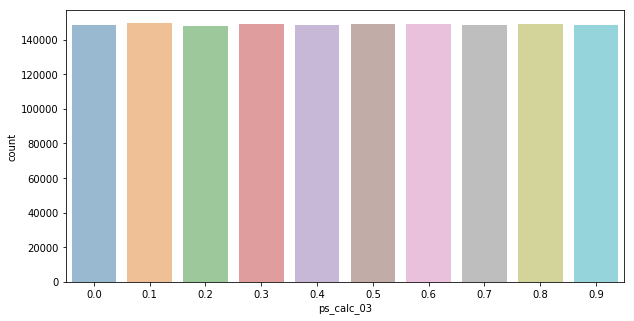

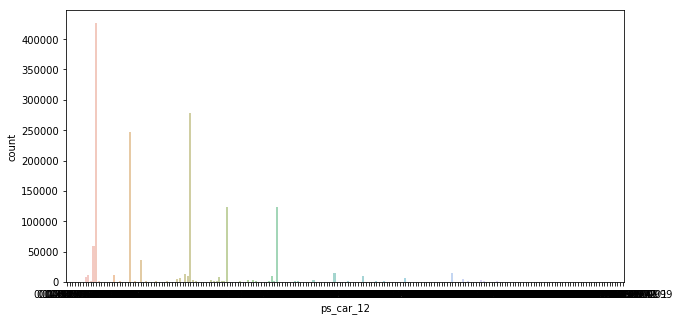

KeyboardInterrupt: 

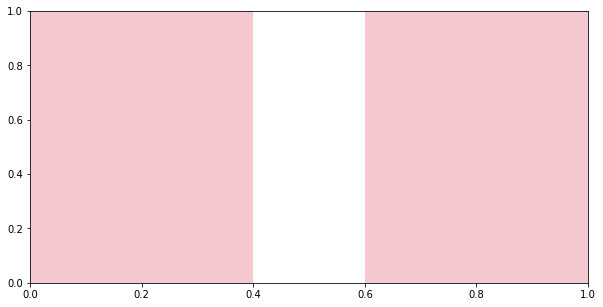

In [15]:
# 실수형 보기
for col in floats:
    bar_plot(col,df)

In [ ]:
# 상관관계 살펴보기
#corr = df.corr()
#f, ax = plt.subplots(figsize=(15,7))
#sns.heatmap(corr,cmap='summer')

In [ ]:
# binary vs target
for col in binary:
    bar_plot_ci(col,df)

In [ ]:
for col in category:
    bar_plot_ci(col,df)
    

In [ ]:
for col in integer:
    bar_plot_ci(col,df)

In [ ]:
train.target.value_counts().plot(kind='bar')

In [ ]:
# 대부분의 target값이 0이 나온다

In [16]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = train.columns[2:]
X = train[labels]
y = train['target']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(conf_mat)


[[114709      0]
 [  4334      0]]


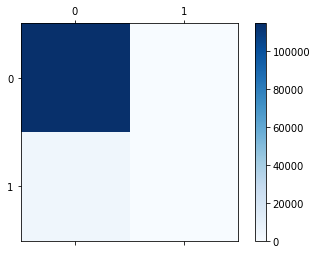

In [17]:
labels = ['class 0','class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

In [20]:
#(0,0)에 몰려있다
# 이럴땐 upsampling이나 downsampling이 필요하다
count_class_0,count_class_1 = train.target.value_counts()
df_class_0 = train[train['target']==0]
df_class_1 = train[train['target']==1]
print(count_class_0)
print(count_class_1)

573518
21694


In [21]:
# downsampling
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
46300,116109,0,6,1.0,6,0.0,0.0,0,0,1,...,11,1,0,6,0,1,1,1,0,0
307404,768270,0,0,1.0,5,0.0,0.0,0,1,0,...,7,0,3,6,0,0,1,0,0,0
70529,176448,0,0,1.0,2,1.0,0.0,1,0,0,...,10,2,1,8,0,0,0,0,1,0
120314,300730,0,0,2.0,2,0.0,0.0,1,0,0,...,9,2,2,9,0,1,1,0,0,0
178131,445195,0,1,1.0,4,1.0,0.0,1,0,0,...,2,1,5,9,0,0,0,1,0,0


In [22]:
df_class_0_under.shape

(21694, 59)

In [23]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
# 새로운 셋 완성 
print(df_test_under.target.value_counts())

1    21694
0    21694
Name: target, dtype: int64


In [24]:
# upsampling
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(573518, 59)